<a href="https://colab.research.google.com/github/yulishadian/Image-Classification_270-268/blob/main/Image_Classification_4_Yunia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/kaggle.json"

In [ ]:
%cd "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers"

/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers


In [ ]:
#!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


# Preprocessing

In [ ]:
!unzip "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers-recognition.zip" -d "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle"

Archive:  /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers-recognition.zip
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10391248763_1d16681106_n.jpg

In [ ]:
!ls

daisy  dandelion  rose	sunflower  tulip


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras import layers,models

In [ ]:
mypath= 'flowers/'

In [10]:
#untuk menetapkan directory

input_folder = "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers"
base_dir = "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/SplitingData"

In [9]:
!pip install split_folders
import splitfolders

In [11]:
splitfolders.ratio(input_folder, output = base_dir, seed=1337, ratio=(0.80,0.19,0.01))

Copying files: 4317 files [14:01,  5.13 files/s]


In [15]:
%cd /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/SplitingData

/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/SplitingData


In [16]:
import os
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_rose_dir = os.path.join(train_dir, 'rose')
train_sunflower_dir = os.path.join(train_dir, 'sunflower')
train_tulip_dir = os.path.join(train_dir, 'tulip')

validation_daisy_dir = os.path.join(validation_dir, 'daisy')
validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')
validation_rose_dir = os.path.join(validation_dir, 'rose')
validation_sunflower_dir = os.path.join(validation_dir, 'sunflower')
validation_tulip_dir = os.path.join(validation_dir, 'tulip')

test_daisy_dir = os.path.join(test_dir, 'daisy')
test_dandelion_dir = os.path.join(test_dir, 'dandelion')
test_rose_dir = os.path.join(test_dir, 'rose')
test_sunflower_dir = os.path.join(test_dir, 'sunflower')
test_tulip_dir = os.path.join(test_dir, 'tulip')

In [17]:
print('Train daisy :', os.listdir(train_daisy_dir)[:10])
print('Train dandelion :', os.listdir(train_dandelion_dir)[:10])
print('Train rose :', os.listdir(train_rose_dir)[:10])
print('Train sunflower :', os.listdir(train_sunflower_dir)[:10])
print('Train tulip :', os.listdir(train_tulip_dir)[:10])
print("\n")

print('Validation daisy :', os.listdir(validation_daisy_dir)[:10])
print('Validation dandelion :', os.listdir(validation_dandelion_dir)[:10])
print('Validation rose :', os.listdir(validation_rose_dir)[:10])
print('Train sunflower :', os.listdir(train_sunflower_dir)[:10])
print('Train tulip :', os.listdir(train_tulip_dir)[:10])
print("\n")

print('Test daisy :', os.listdir(test_daisy_dir)[:10])
print('Test dandelion :', os.listdir(test_dandelion_dir)[:10])
print('Test rose :', os.listdir(test_rose_dir)[:10])
print('Train sunflower :', os.listdir(train_sunflower_dir)[:10])
print('Train tulip :', os.listdir(train_tulip_dir)[:10])

Train daisy : ['33809956124_b49dcddf8f_n.jpg', '7790614422_4557928ab9_n.jpg', '144603918_b9de002f60_m.jpg', '5869147563_66fb88119d.jpg', '5110105726_53eb7a93be_m.jpg', '4482623536_b9fb5ae41f_n.jpg', '2511306240_9047015f2d_n.jpg', '9346508462_f0af3163f4.jpg', '33806101464_5eca772954_n.jpg', '5740004086_690a1eef85_n.jpg']
Train dandelion : ['5109496141_8dcf673d43_n.jpg', '34601267911_00c92c9a04_n.jpg', '176284193_8fa1710431_m.jpg', '16237158409_01913cf918_n.jpg', '3530500952_9f94fb8b9c_m.jpg', '160456948_38c3817c6a_m.jpg', '9595369280_dd88b61814.jpg', '34722644565_812fcc1397_n.jpg', '34234226791_63a2afc7ed_n.jpg', '130733200_fbe28eea19.jpg']
Train rose : ['3500121696_5b6a69effb_n.jpg', '17104364030_ee31ee279b_n.jpg', '5333437251_ce0aa6925d_n.jpg', '2215318403_06eb99176a.jpg', '5570018782_c56bee942f.jpg', '7456887736_54e4ebac03_n.jpg', '9404876600_04f6d37685.jpg', '459042023_6273adc312_n.jpg', '20825078671_90b0389c70_m.jpg', '3268459296_a7346c6b2c.jpg']
Train sunflower : ['5923085671_f81d

In [18]:
print('Train daisy :', len(os.listdir(train_daisy_dir)))
print('Train dandelion :', len(os.listdir(train_dandelion_dir)))
print('Train rose :', len(os.listdir(train_rose_dir)))
print('Train sunflower :', len(os.listdir(train_sunflower_dir)))
print('Train tulip :', len(os.listdir(train_tulip_dir)))
print("\n")

print('Validation daisy :', len(os.listdir(validation_daisy_dir)))
print('Validation dandelion :', len(os.listdir(validation_dandelion_dir)))
print('Validation rose :', len(os.listdir(validation_rose_dir)))
print('Validation sunflower :', len(os.listdir(validation_sunflower_dir)))
print('Validation tulip :', len(os.listdir(validation_tulip_dir)))
print("\n")

print('Test daisy :', len(os.listdir(test_daisy_dir)))
print('Test dandelion :', len(os.listdir(test_dandelion_dir)))
print('Test rose :', len(os.listdir(test_rose_dir)))
print('Test sunflower :', len(os.listdir(test_sunflower_dir)))
print('Test tulip :', len(os.listdir(test_tulip_dir)))

Train daisy : 611
Train dandelion : 841
Train rose : 627
Train sunflower : 586
Train tulip : 787


Validation daisy : 145
Validation dandelion : 199
Validation rose : 148
Validation sunflower : 139
Validation tulip : 186


Test daisy : 8
Test dandelion : 12
Test rose : 9
Test sunflower : 8
Test tulip : 11


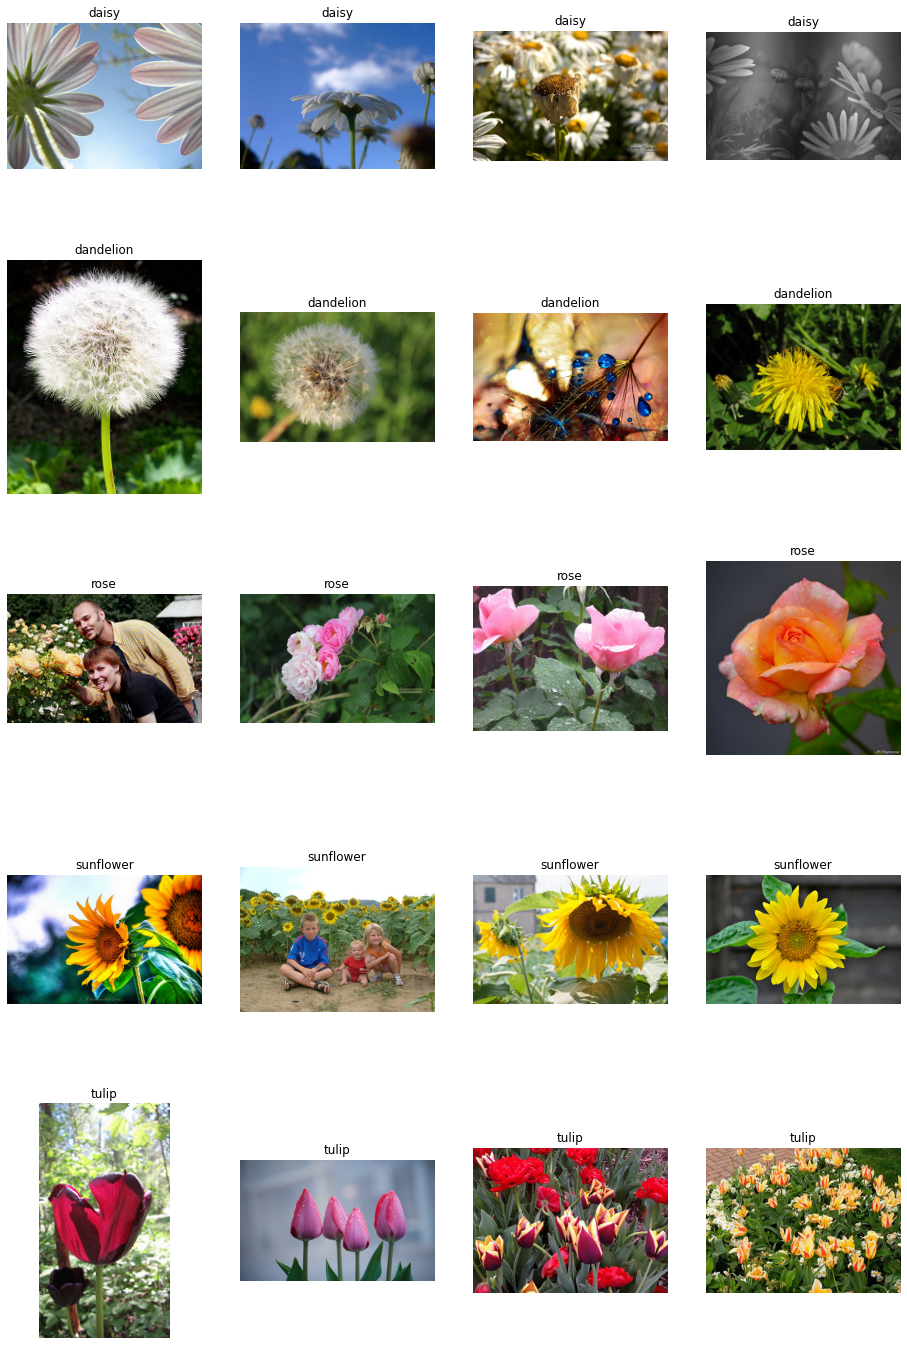

In [26]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 5
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 5)

pic_index += 9

train_daisy = [os.path.join(train_daisy_dir, fname) 
                for fname in os.listdir(train_daisy_dir)[pic_index-4:pic_index]]

train_dandelion = [os.path.join(train_dandelion_dir, fname) 
                for fname in os.listdir(train_dandelion_dir)[pic_index-4:pic_index]]

train_rose = [os.path.join(train_rose_dir, fname) 
                for fname in os.listdir(train_rose_dir)[pic_index-4:pic_index]]

train_sunflower = [os.path.join(train_sunflower_dir, fname) 
                for fname in os.listdir(train_sunflower_dir)[pic_index-4:pic_index]]

train_tulip = [os.path.join(train_tulip_dir, fname) 
                for fname in os.listdir(train_tulip_dir)[pic_index-4:pic_index]]
                        

for i, img_path in enumerate(train_daisy+train_dandelion+train_rose+train_sunflower+train_tulip):
    
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

In [38]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [39]:
width=150
height=150
batch_size=32

pre_train_dir = "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/SplitingData/train"
pre_validation_dir = "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/SplitingData/val"
pre_test_dir = "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/SplitingData/test"
datagen = ImageDataGenerator(rescale=0)

train_gen = datagen.flow_from_directory(
    pre_train_dir,
    target_size=(150,150),
    shuffle=True,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    pre_validation_dir,
    target_size=(150,150),
    shuffle=False,
    class_mode='categorical'
)

test_gen = datagen.flow_from_directory(
    pre_test_dir,
    target_size=(150,150),
    shuffle=False,
    class_mode='categorical'
)

Found 3452 images belonging to 5 classes.
Found 817 images belonging to 5 classes.
Found 48 images belonging to 5 classes.


In [ ]:
#Model 1 Yunia

In [40]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout,AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [41]:
from tensorboard.plugins.hparams import api as hp

In [42]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [43]:
!rm -rf ./logs/ 

In [44]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([64, 128]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.3, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'adadelta']))
HP_LEARNING_RATE= hp.HParam('learning_rate', hp.Discrete([0.001]))

METRIC_ACCURACY = 'accuracy'

hparam_summary_dir = '/content/gdrive/MyDrive/Tugas Besar ML/summary'

In [45]:
first_mine_model_dict = dict()
first_mine_history_dict = dict()

second_mine_model_dict = dict()
second_mine_history_dict = dict()

In [46]:
xtest, ytest = zip(*(test_gen[i] for i in range(len(test_gen))))
x_test, y_test = np.vstack(xtest), np.vstack(ytest)

In [47]:
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, InputLayer, MaxPool2D, SeparableConv2D
from tensorflow.keras.optimizers import Adam
import json

In [48]:
def train_test_first_model(hparams, session_num):
    global first_mine_model_dict
    global first_mine_history_dict

    model = Sequential()

    # Feature Extraction Layer
    model.add(InputLayer(input_shape=[150,150,3]))
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(MaxPool2D())
   
    model.add(BatchNormalization())
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(hparams[HP_NUM_UNITS], activation='relu'))
    model.add(Dense(36, activation='relu'))
    model.add(Dropout(hparams[HP_DROPOUT]))
    model.add(Dense(5, activation='softmax'))

   # Compile Model
    model.compile(
        optimizer=hparams[HP_OPTIMIZER],
        loss='categorical_crossentropy',
        metrics='accuracy'
    )

    # Fit Model
    H = model.fit(train_gen,
                 validation_data=val_gen, 
                  epochs=5,
                  )
    
    # Gather Model and History
    first_mine_model_dict[session_num] = model
    first_mine_history_dict[session_num] = H.history

    # Evaluate Model
    _, accuracy = model.evaluate(x_test, y_test)

    return accuracy

In [49]:
def first_model_run(run_dir, hparams, session_num):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)
        accuracy = train_test_first_model(hparams, session_num)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=5)

In [50]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
    for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
        for optimizer in HP_OPTIMIZER.domain.values:
            hparams = {
                HP_NUM_UNITS: num_units,
                HP_DROPOUT: dropout_rate,
                HP_OPTIMIZER: optimizer,
            } 
            run_name = "first_model_run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            first_model_run((hparam_summary_dir + '/' + run_name) ,hparams, session_num)
            session_num += 1

--- Starting trial: first_model_run-0
{'num_units': 64, 'dropout': 0.3, 'optimizer': 'adadelta'}
Epoch 1/5
108/108 [==============================] - 104s 949ms/step - loss: 2.0125 - accuracy: 0.2196 - val_loss: 1.7391 - val_accuracy: 0.2375
Epoch 2/5
108/108 [==============================] - 104s 964ms/step - loss: 1.7915 - accuracy: 0.2616 - val_loss: 1.5868 - val_accuracy: 0.3170
Epoch 3/5
108/108 [==============================] - 102s 942ms/step - loss: 1.6923 - accuracy: 0.2952 - val_loss: 1.5267 - val_accuracy: 0.3439
Epoch 4/5
108/108 [==============================] - 102s 943ms/step - loss: 1.6268 - accuracy: 0.3253 - val_loss: 1.4922 - val_accuracy: 0.3672
Epoch 5/5
2/2 [==============================] - 0s 124ms/step - loss: 1.5162 - accuracy: 0.4375
--- Starting trial: first_model_run-1
{'num_units': 64, 'dropout': 0.3, 'optimizer': 'adam'}
Epoch 1/5
108/108 [==============================] - 102s 939ms/step - loss: 1.7108 - accuracy: 0.3951 - val_loss: 2.0473 - val_accur

In [51]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns

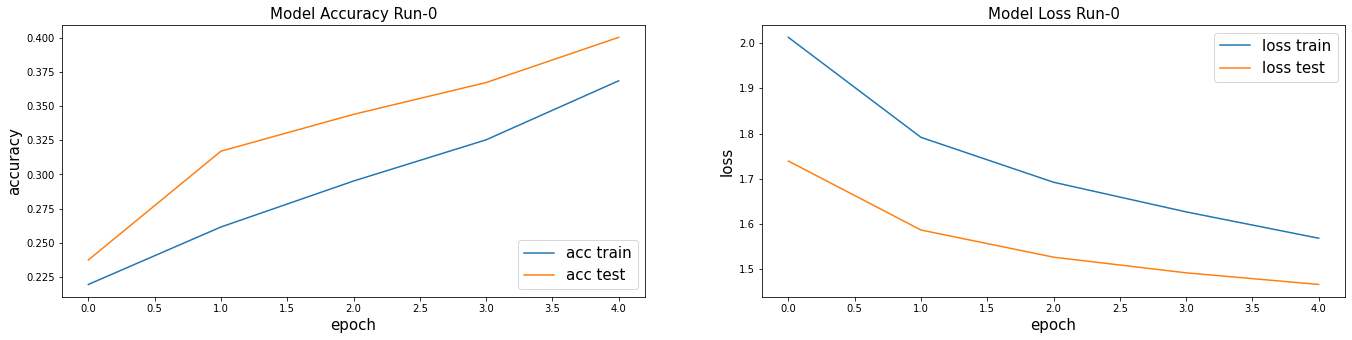

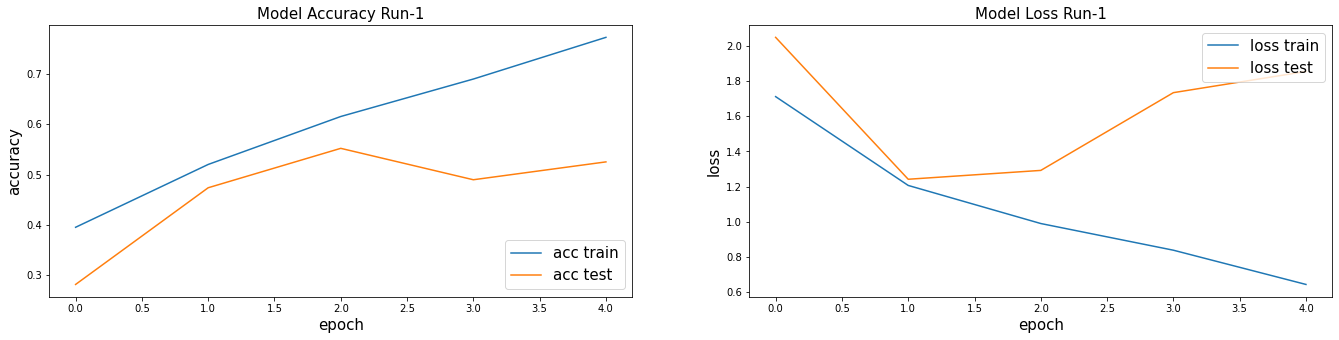

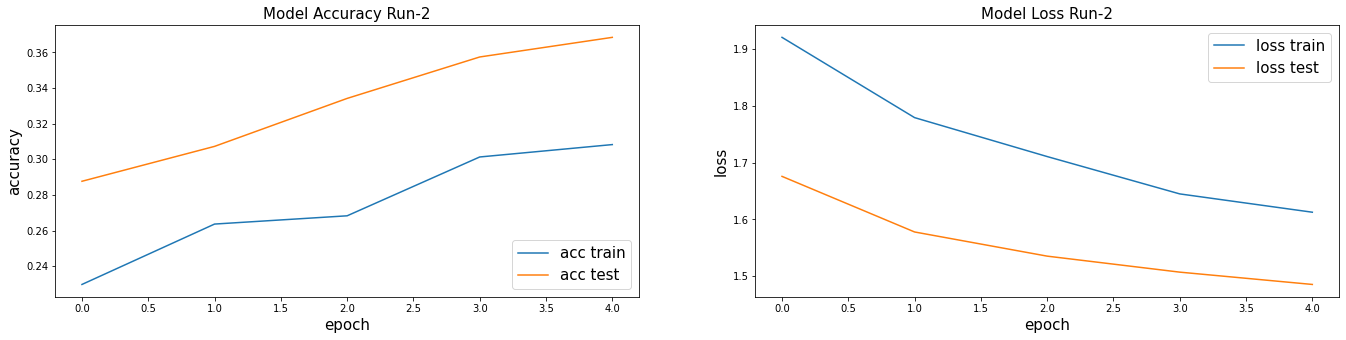

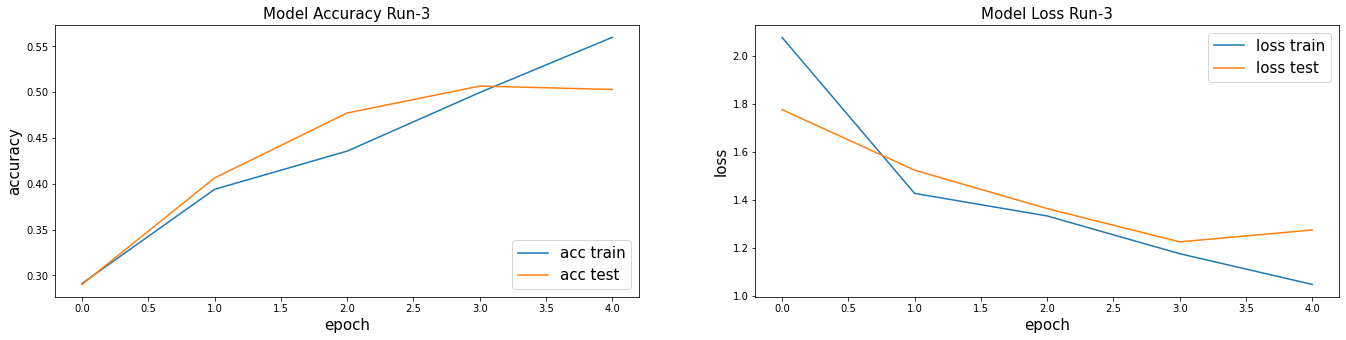

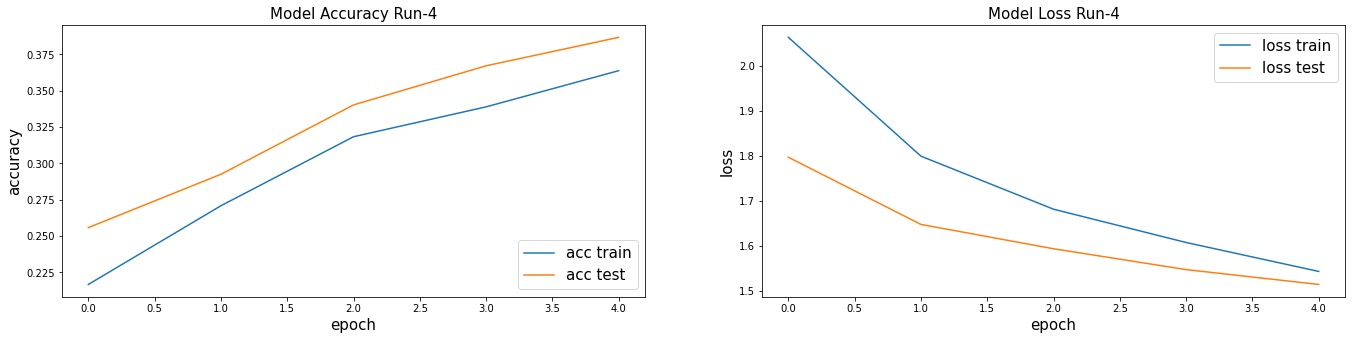

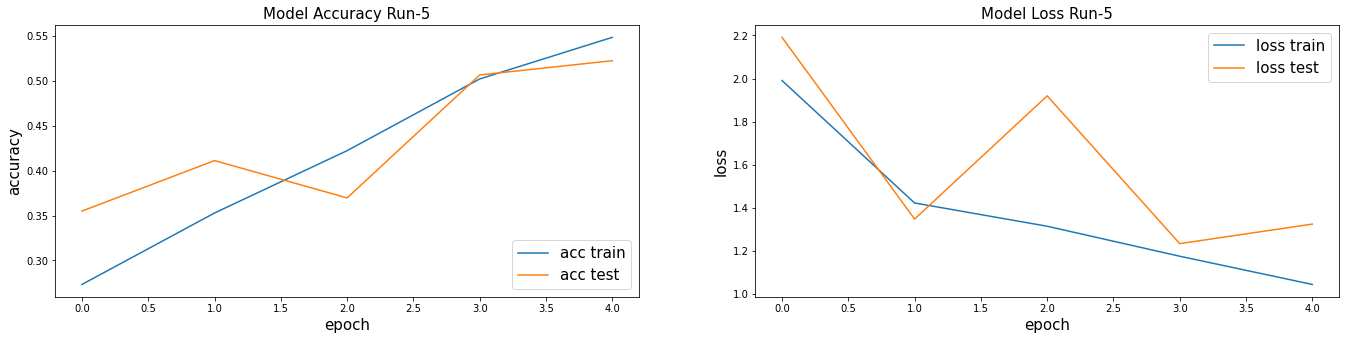

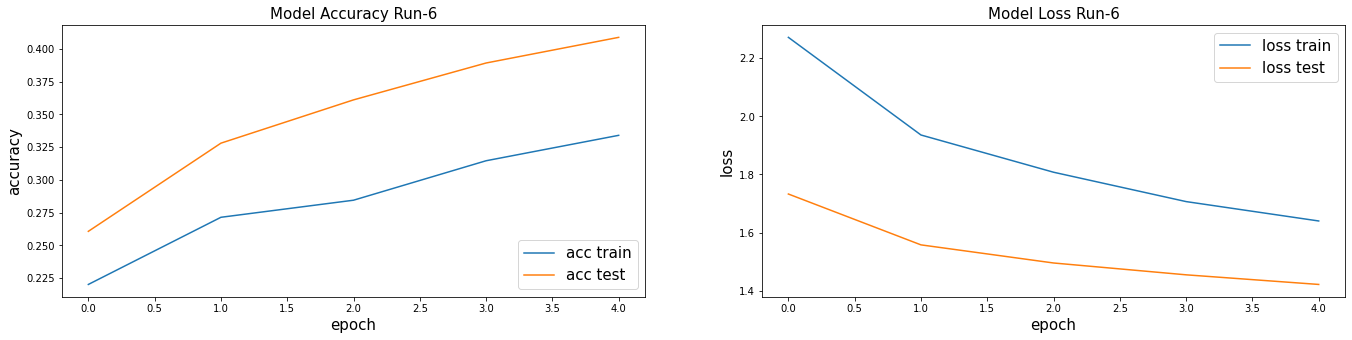

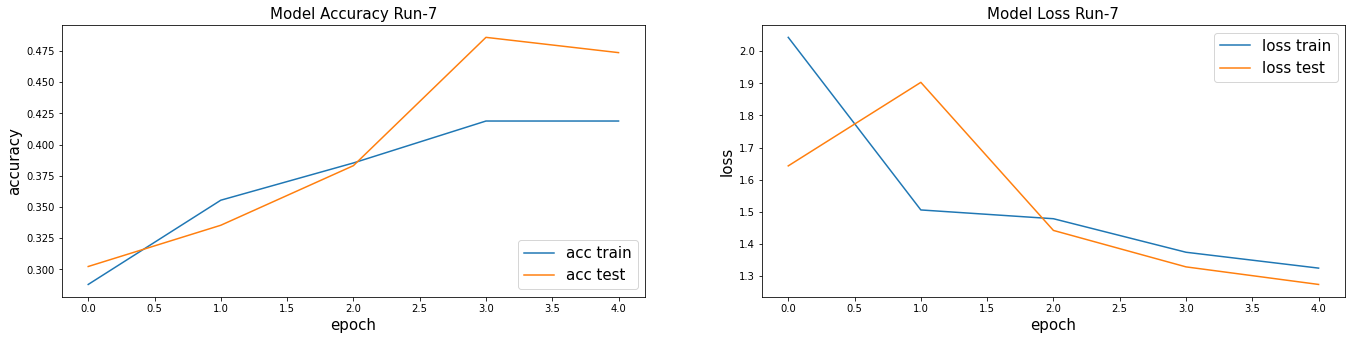

In [52]:
for key, history_dict in first_mine_history_dict.items():
    plt.figure(figsize = (23,5))

    plt.subplot(1, 2, 1)
    plt.xticks(fontsize='10')
    plt.yticks(fontsize='10')
    plt.plot(history_dict['accuracy'])
    plt.plot(history_dict['val_accuracy'])
    plt.title(f'Model Accuracy Run-{key}', fontsize=15)
    plt.ylabel('accuracy', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend(['acc train', 'acc test'], loc='lower right', fontsize=15)

    plt.subplot(1, 2, 2)
    plt.xticks(fontsize='10')
    plt.yticks(fontsize='10')
    plt.plot(history_dict['loss'])
    plt.plot(history_dict['val_loss'])
    plt.title(f'Model Loss Run-{key}', fontsize=15)
    plt.ylabel('loss', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend(['loss train', 'loss test'], loc='upper right', fontsize=15)
    plt.show()

In [53]:
for key, trained_model in first_mine_model_dict.items():
        Y_pred = trained_model.predict_generator(test_gen)
        y_pred = np.argmax(Y_pred, axis=1)

        print(f"Model Run-{key}")
        target_names = []

        for key in train_gen.class_indices:
                target_names.append(key)
        print(classification_report(test_gen.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Model Run-0
              precision    recall  f1-score   support

       daisy       0.25      0.25      0.25         8
   dandelion       0.53      0.67      0.59        12
        rose       0.20      0.11      0.14         9
   sunflower       0.60      0.38      0.46         8
       tulip       0.47      0.64      0.54        11

    accuracy                           0.44        48
   macro avg       0.41      0.41      0.40        48
weighted avg       0.42      0.44      0.42        48



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Model Run-1
              precision    recall  f1-score   support

       daisy       0.50      0.25      0.33         8
   dandelion       0.45      0.75      0.56        12
        rose       0.50      0.22      0.31         9
   sunflower       0.67      0.25      0.36         8
       tulip       0.35      0.55      0.43        11

    accuracy                           0.44        48
   macro avg       0.49      0.40      0.40        48
weighted avg       0.48      0.44      0.41        48



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Model Run-2
              precision    recall  f1-score   support

       daisy       0.25      0.25      0.25         8
   dandelion       0.35      0.50      0.41        12
        rose       0.33      0.22      0.27         9
   sunflower       0.33      0.50      0.40         8
       tulip       0.00      0.00      0.00        11

    accuracy                           0.29        48
   macro avg       0.25      0.29      0.27        48
weighted avg       0.25      0.29      0.26        48



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Model Run-3
              precision    recall  f1-score   support

       daisy       0.50      0.50      0.50         8
   dandelion       0.64      0.75      0.69        12
        rose       0.00      0.00      0.00         9
   sunflower       0.33      0.12      0.18         8
       tulip       0.26      0.55      0.35        11

    accuracy                           0.42        48
   macro avg       0.35      0.38      0.35        48
weighted avg       0.36      0.42      0.37        48



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: Use

Model Run-4
              precision    recall  f1-score   support

       daisy       0.14      0.25      0.18         8
   dandelion       0.50      0.50      0.50        12
        rose       0.44      0.44      0.44         9
   sunflower       0.25      0.25      0.25         8
       tulip       0.40      0.18      0.25        11

    accuracy                           0.33        48
   macro avg       0.35      0.33      0.33        48
weighted avg       0.37      0.33      0.34        48



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Model Run-5
              precision    recall  f1-score   support

       daisy       0.50      0.62      0.56         8
   dandelion       0.60      0.75      0.67        12
        rose       0.56      0.56      0.56         9
   sunflower       0.57      0.50      0.53         8
       tulip       0.57      0.36      0.44        11

    accuracy                           0.56        48
   macro avg       0.56      0.56      0.55        48
weighted avg       0.56      0.56      0.55        48



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Model Run-6
              precision    recall  f1-score   support

       daisy       0.19      0.38      0.25         8
   dandelion       0.42      0.42      0.42        12
        rose       1.00      0.33      0.50         9
   sunflower       0.50      0.62      0.56         8
       tulip       0.43      0.27      0.33        11

    accuracy                           0.40        48
   macro avg       0.51      0.40      0.41        48
weighted avg       0.50      0.40      0.41        48



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Model Run-7
              precision    recall  f1-score   support

       daisy       0.44      0.50      0.47         8
   dandelion       0.33      0.58      0.42        12
        rose       1.00      0.11      0.20         9
   sunflower       0.57      0.50      0.53         8
       tulip       0.30      0.27      0.29        11

    accuracy                           0.40        48
   macro avg       0.53      0.39      0.38        48
weighted avg       0.51      0.40      0.38        48



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


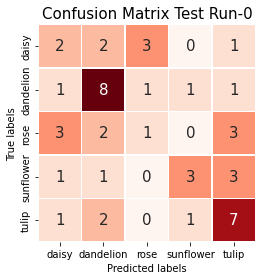

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


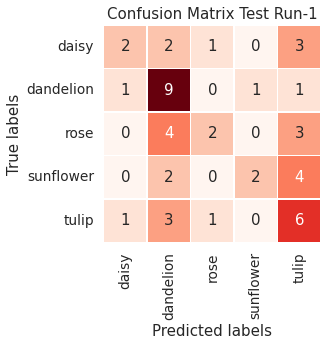

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


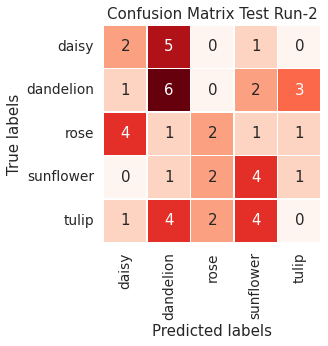

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


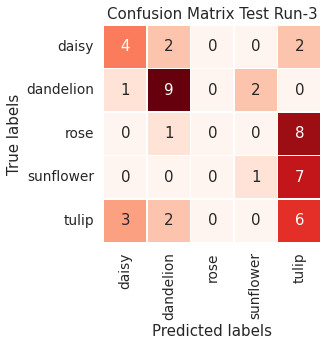

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


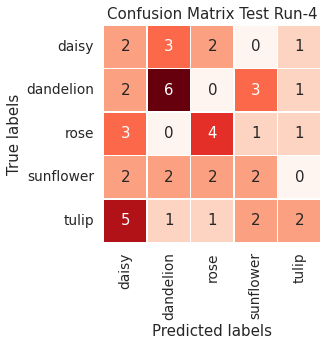

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


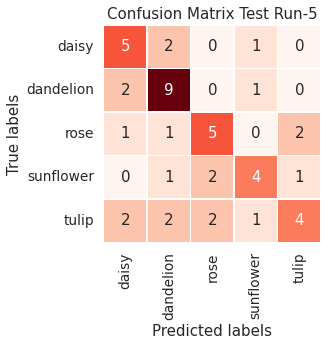

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


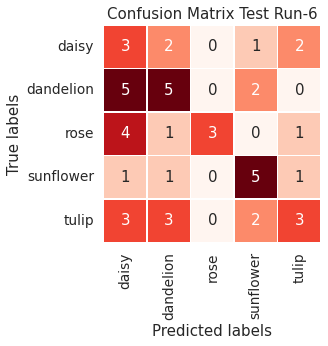

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


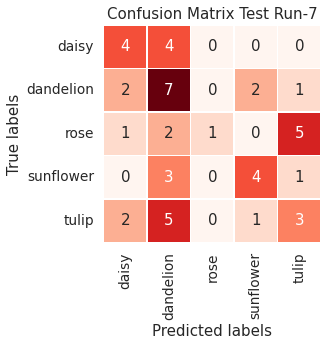

In [62]:
class_names = test_gen.class_indices
    
for key, trained_model in first_mine_model_dict.items():
    Y_pred = trained_model.predict_generator(test_gen)
    y_pred = np.argmax(Y_pred, axis=1)

    Cmatrix_test = confusion_matrix(test_gen.classes, y_pred)
    
    plt.figure(figsize=(4,4))
    ax = plt.subplot()

    data = np.asarray(Cmatrix_test).reshape(5,5)

    sns.set(font_scale=1.25)
    sns.heatmap(data,
                annot=True,
                ax=ax,
                cmap=plt.cm.Reds,
                square=True,
                cbar=False,
                linewidths=.5,
                xticklabels=class_names, yticklabels=class_names
                )

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.title(f'Confusion Matrix Test Run-{key}')
    plt.show()

In [73]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [74]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 batch_normalization_18 (Bat  (None, 150, 150, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 batch_normalization_19 (Bat  (None, 75, 75, 32)       128       
 chNormalization)                                                
                                                     

In [75]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [78]:
history2 = model.fit(train_gen, batch_size=32, epochs=50, validation_data = val_gen)

Epoch 1/50
108/108 [==============================] - 147s 1s/step - loss: 1.4669 - acc: 0.5032 - val_loss: 1.3780 - val_acc: 0.5129
Epoch 2/50
108/108 [==============================] - 146s 1s/step - loss: 0.9363 - acc: 0.6437 - val_loss: 0.9162 - val_acc: 0.6610
Epoch 3/50
108/108 [==============================] - 144s 1s/step - loss: 0.7703 - acc: 0.7086 - val_loss: 1.0058 - val_acc: 0.6083
Epoch 4/50
108/108 [==============================] - 145s 1s/step - loss: 0.6699 - acc: 0.7497 - val_loss: 0.8773 - val_acc: 0.6769
Epoch 5/50
108/108 [==============================] - 144s 1s/step - loss: 0.5737 - acc: 0.7836 - val_loss: 0.8572 - val_acc: 0.7050
Epoch 6/50
108/108 [==============================] - 144s 1s/step - loss: 0.5074 - acc: 0.8085 - val_loss: 0.8544 - val_acc: 0.7160
Epoch 7/50
108/108 [==============================] - 144s 1s/step - loss: 0.3921 - acc: 0.8540 - val_loss: 1.0428 - val_acc: 0.6928
Epoch 8/50
108/108 [==============================] - 144s 1s/step - 

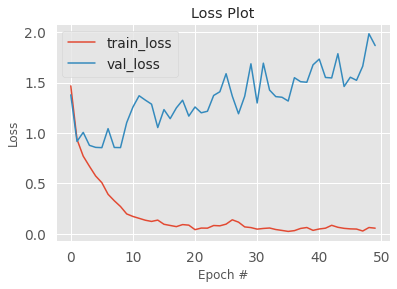

In [80]:
# Tulis Program Anda Disini!
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
#plt.axis(0,15,0,8)
plt.plot(np.arange(0, 50), history2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), history2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

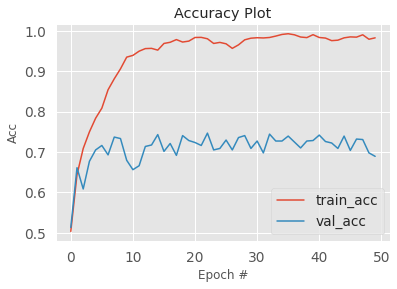

In [81]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), history2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), history2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [83]:
target_names = []
for key in train_gen.class_indices:
    target_names.append(key)
print(target_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [84]:
from sklearn.metrics import classification_report

pred = model.predict(test_gen)
labels = np.argmax(pred, axis=1)

print(classification_report(test_gen.classes, labels, target_names=target_names))

              precision    recall  f1-score   support

       daisy       0.71      0.62      0.67         8
   dandelion       0.78      0.58      0.67        12
        rose       0.67      0.22      0.33         9
   sunflower       0.62      0.62      0.62         8
       tulip       0.38      0.73      0.50        11

    accuracy                           0.56        48
   macro avg       0.63      0.56      0.56        48
weighted avg       0.63      0.56      0.56        48



In [85]:
from sklearn.metrics import classification_report

pred = model.predict(train_gen)
labels = np.argmax(pred, axis=1)

print(classification_report(train_gen.classes, labels, target_names=target_names))

              precision    recall  f1-score   support

       daisy       0.17      0.17      0.17       611
   dandelion       0.24      0.24      0.24       841
        rose       0.19      0.14      0.16       627
   sunflower       0.16      0.17      0.16       586
       tulip       0.24      0.29      0.27       787

    accuracy                           0.21      3452
   macro avg       0.20      0.20      0.20      3452
weighted avg       0.21      0.21      0.21      3452



In [86]:
from sklearn.metrics import classification_report

pred = model.predict(val_gen)
labels = np.argmax(pred, axis=1)

print(classification_report(val_gen.classes, labels, target_names=target_names))

              precision    recall  f1-score   support

       daisy       0.70      0.71      0.70       145
   dandelion       0.82      0.75      0.78       199
        rose       0.73      0.26      0.38       148
   sunflower       0.76      0.82      0.79       139
       tulip       0.56      0.85      0.67       186

    accuracy                           0.69       817
   macro avg       0.71      0.68      0.67       817
weighted avg       0.71      0.69      0.67       817



In [90]:
import json

target_dir = '/content/gdrive/MyDrive/Tugas Besar ML/Kaggle'

# simpan history model kedua
history_dict = history2.history
json.dump(history_dict, open(target_dir + '/history_model_2.json', 'w'))

# simpan model pertama dan weight-nya
model.save(target_dir + '/model_2.h5')
model.save_weights(target_dir + '/model_2_weights.h5')